### Group Members:



* Courtney Mueller
* Angel Camacho 
* Matthew Grover 

In [19]:
#importing potentially necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from matplotlib import pyplot as plt

***
## First Dataset: [FirstDataset](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/code?resource=download)
#### Display information about rows and columns in dataset:

In [20]:
df1 = pd.read_csv('./Data/game_info.csv')

Df1 base stats 

In [21]:
print("shape: ",df1.shape)

shape:  (474417, 27)


plotting genre frequency \
from the genre count we can see that we have sufficient games to produce reccomendations 

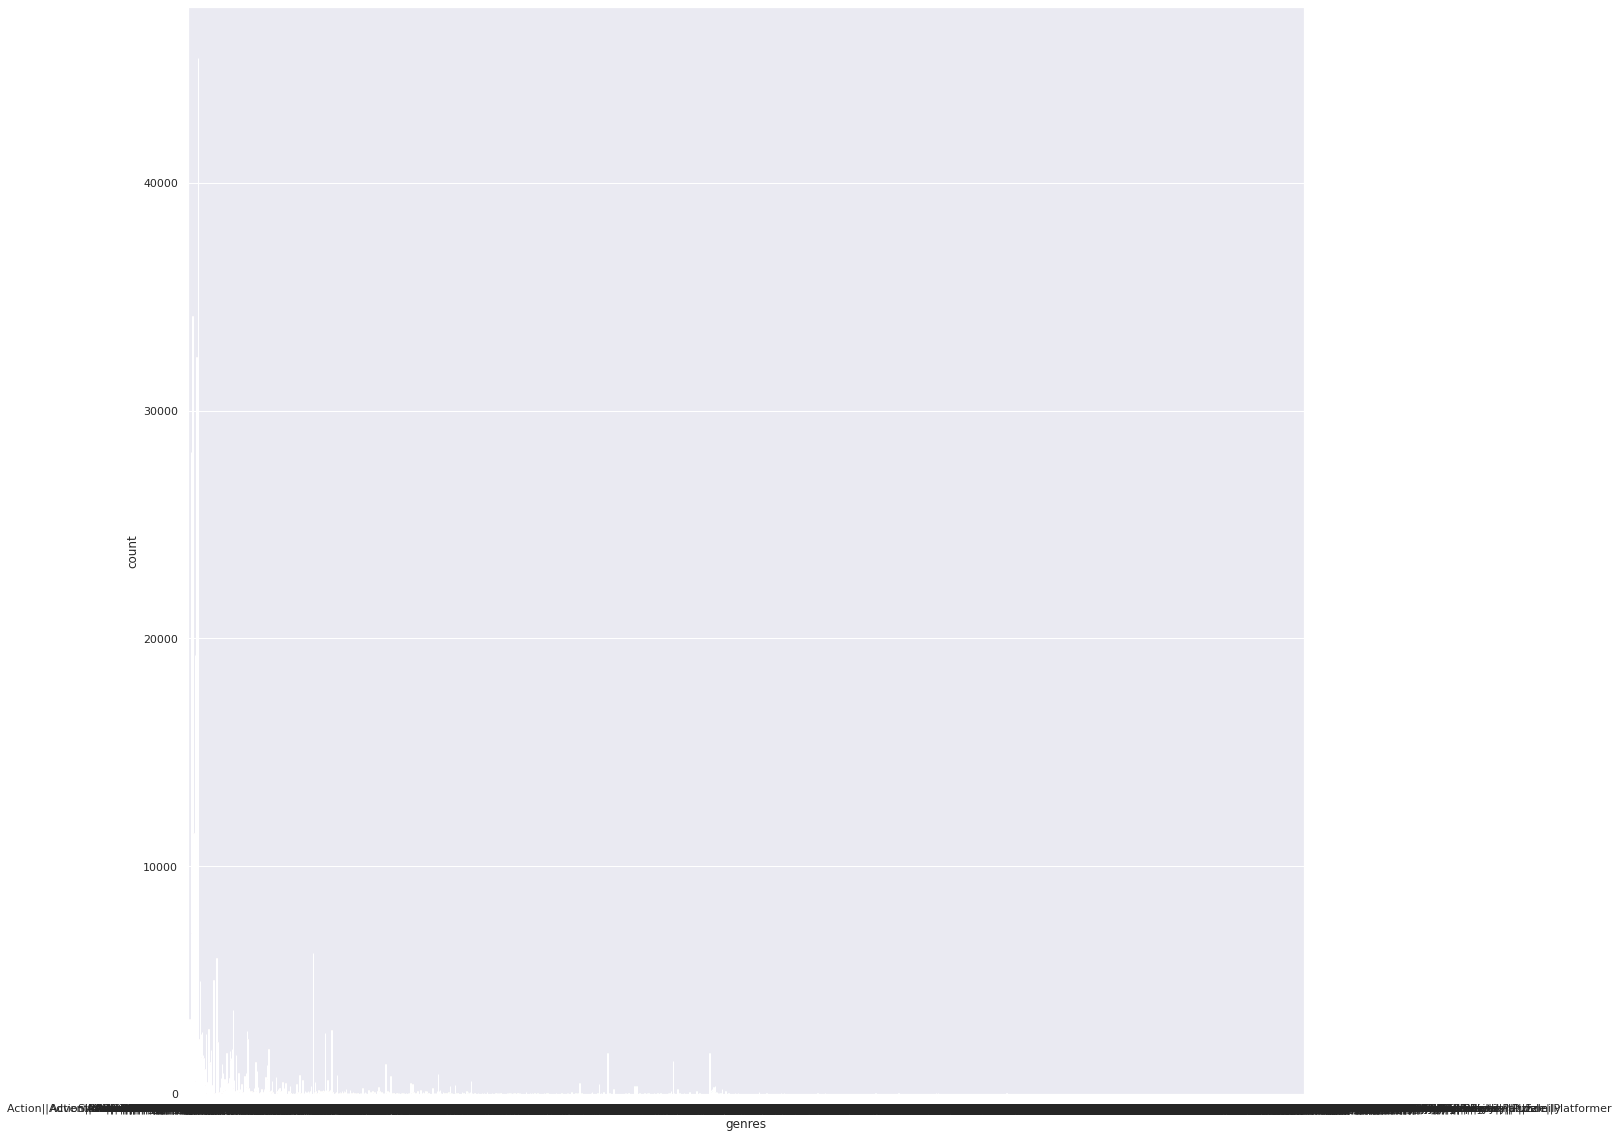

In [22]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="genres",data=df1)


# Second Kaggle Dataset
https://www.kaggle.com/datasets/gregorut/videogamesales

Read in data set 

In [23]:
df2 = pd.read_csv('./Data/vgsales.csv')
print("shape: ",df2.shape)
df2.head()

shape:  (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


plot genre freq

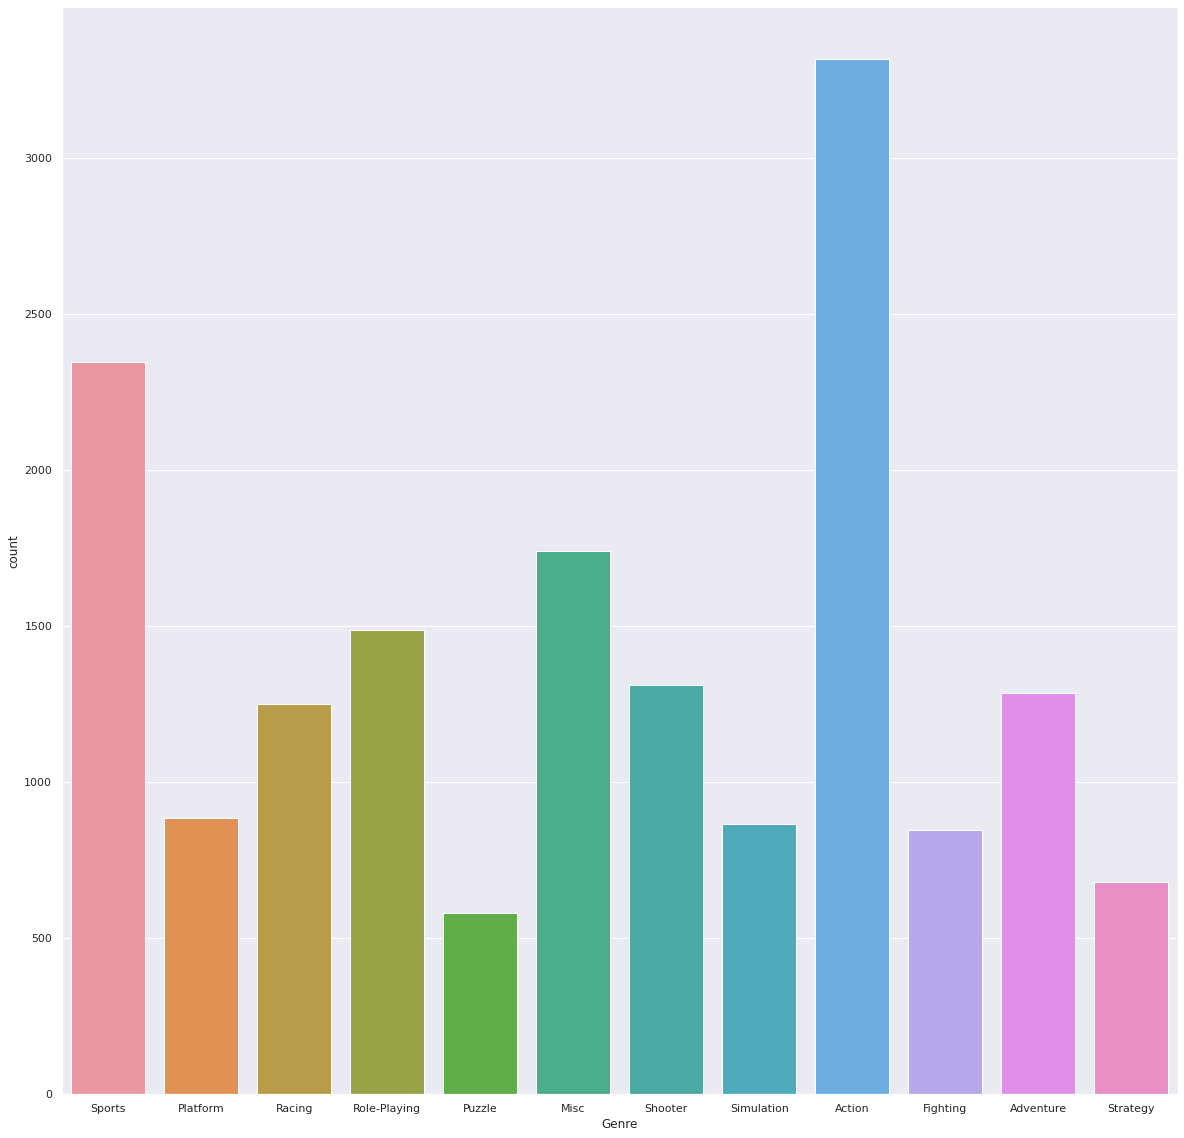

In [24]:
sns.set(rc={"figure.figsize":(20, 20)}) #width=8, height=4
ax = sns.countplot(x="Genre",data=df2)

---


# **Analysis** 

The two datasets that we have chosen for our project have both shown sufficient instances and provide viable statistics for a reliable analysis. While one has a larger variety of genres for nuanced analysis. The second data set has the smaller set of data but also a more concise set of genres, making it easier for us to analyze the data based on genre of game. Having some type of filter system for genre is something we wanted to rely heavily upon for our database analysis so having something that has that implemented prior makes it a little easier on us to conceptualize how we want to bring our project together. After having a meeting and coming together to agree upon the direction we want to take our project in - we decided that the main focus of our project is going to be grouping together game titles based upon genre in hopes to establish a target audience. We are hoping with this target audience we will be able to initiate an increase in willingness to try new game titles based upon recommendations based on our anaylsis. Due to the nature of this problem, we see our project being a good example of a "clustering" data mining technique.

### Stage 4 pre work (note placeholder incase of no work for turn in)

inspired by analysis done on kaggle
https://www.kaggle.com/code/arthurtok/the-console-wars-ps-vs-xbox-vs-wii

In [25]:
#clean the data set
#df1 = df1.dropna()
vgs = df2.dropna()

In [26]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
vgs.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<AxesSubplot:title={'center':'Pearson Correlation of Video Game Numerical Features'}>

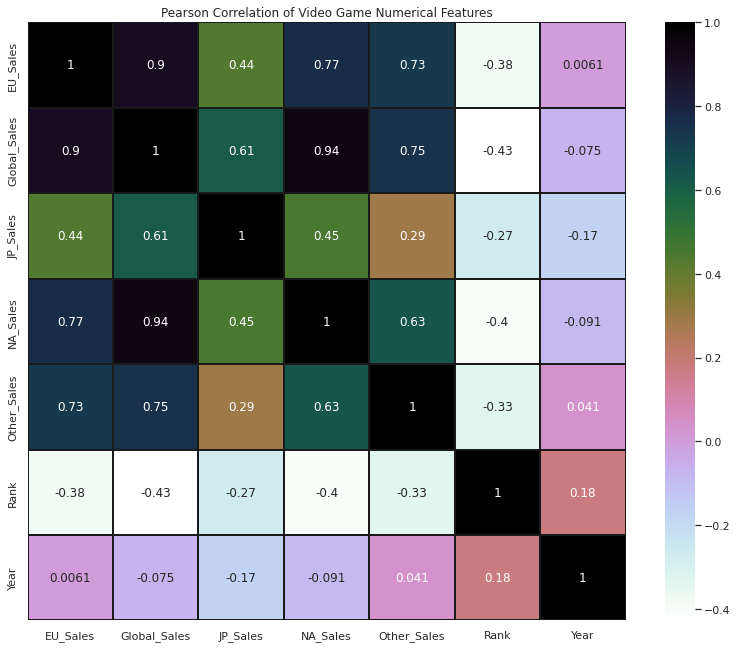

In [28]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in vgs.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = vgs.columns.difference(str_list) 
# Create Dataframe containing only numerical features
video_num = vgs[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(video_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [29]:
# Dataframe contain info only on the 7th Gen consoles
video7th = vgs[(vgs['Platform'] == 'WiiU') | (vgs['Platform'] == 'XOne') | (vgs['Platform'] == 'PS4')]
video7th.shape

vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


Text(0, 0.5, 'Global Sales')

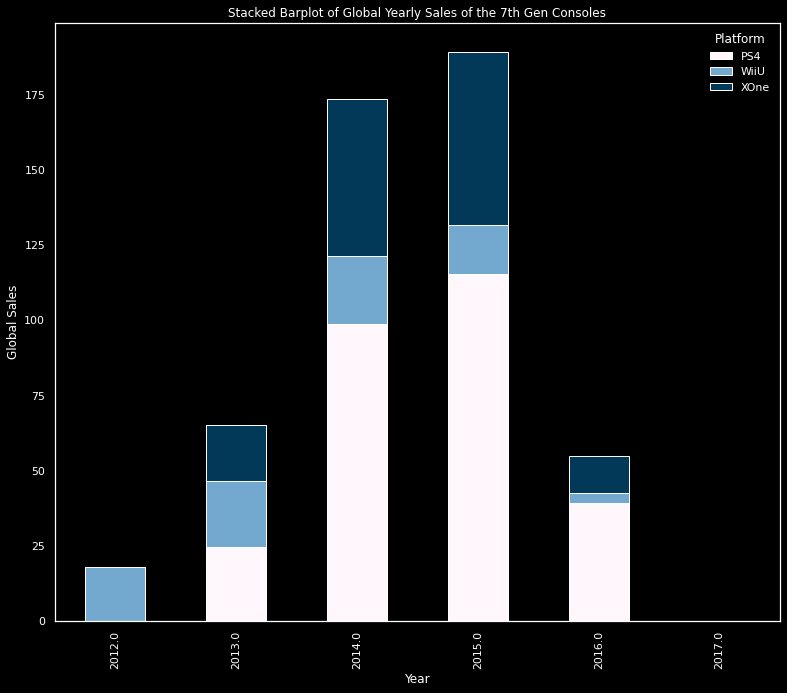

In [30]:
plt.style.use('dark_background')
yearlySales = video7th.groupby(['Year','Platform']).Global_Sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

Text(0, 0.5, 'Sales')

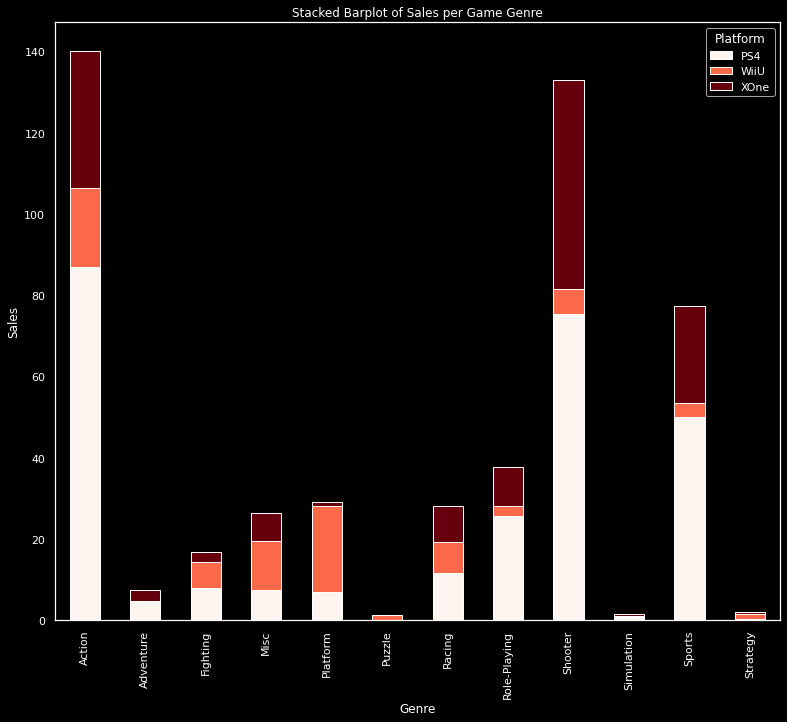

In [13]:
plt.style.use('dark_background')
genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Reds', 
                          grid=False, figsize=(13,11))
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')

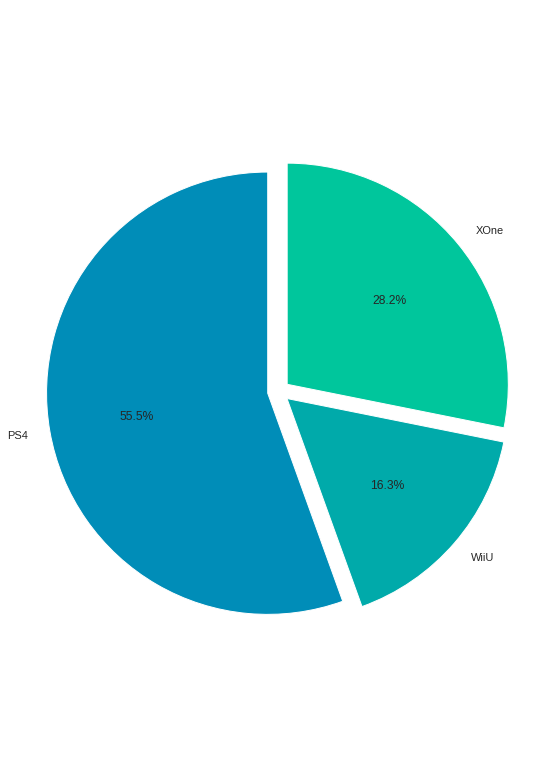

In [14]:
# Plotting our pie charts
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['#008DB8','#00AAAA','#00C69C']
plt.figure(figsize=(15,11))
plt.subplot(121)
plt.pie(
   video7th.groupby('Platform').Global_Sales.sum(),
    # with the labels being platform
    labels=video7th.groupby('Platform').Global_Sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

plt.axis('equal')
plt.tight_layout()
plt.show()

### Game sales by publisher stage 4 
we want to analyse how publisher may affect sales in regions


In [15]:
vgs.info()
vgs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


After runnning this piece of code we will see that there are no indie games when compared to a list of indie games from wikepidia. This means in later stages we might want to include a indie game database to include that side of the market. 

In [16]:
inlist = False
count =0
with open('./Data/indiegames.txt', 'r') as reader:
    # Read and print the entire file line by line
    line = reader.readline()
    while line != '':  # The EOF char is an empty string
        #print(line, end='')
        line = reader.readline()
        y = line.lower()
        y = y.replace(" ","")
        y.strip()
        for i in vgs['Name']:
            i = i.lower()
            i = i.replace(" ","")
            i.strip()
            if y == i:
                inlist =True
                count+=1
            
if inlist:
    print("there exist some indie games:")
    print("sum of indie games in list: ",count)
else:
    print("no indie games")
        

no indie games


In [17]:
#ensure no non existant rows that will mess with our data
vgs = vgs.dropna(axis = 0)

From this we can see that there is a large variety of publishers meaning we may want to shrink the number of publishers we are looking at. We produce a csv that shows how many times a unique publisher shows up in the data set. We generate a new csv with that data. 

In [18]:
#generate a list wich may be easier to use in code
countlist = vgs['Publisher'].value_counts()
print(countlist)
#generate a new csv code for count data 
#commented out to prvent constant writes
# count = vgs.groupby(['Publisher']).count()
# count.head()
# count.to_csv('./Data/publishercount.csv')

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64


In [1]:
print("this is a git test")

this is a git test
